In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../data/forestfires_eyewitness_crowdflower_2000.tsv',sep = '\t')

In [3]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'please_choose_a_category_:confidence',
       'created_at', 'id_str', 'rownames', 'please_choose_a_category_', 'text',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [4]:
df['please_choose_a_category_'].unique()

array(['direct_eyewitness', 'dont_know', 'noneyewitness'], dtype=object)

In [5]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_choose_a_category_:confidence,created_at,id_str,rownames,please_choose_a_category_,text,Unnamed: 11,Unnamed: 12
0,1830763346,False,finalized,3,7/26/2018 12:30:49,1.0000,Sat May 07 07:17:21 +0000 2016,",728846163798020096,",50034,direct_eyewitness,Damn this Canadian Wildfire got the whole city...,NaN,NaN
1,1830764158,False,finalized,3,7/26/2018 11:16:12,0.6493,Tue Oct 10 18:41:33 +0000 2017,",917822427903623168,",3296,direct_eyewitness,Devastating to see such widespread destruction...,NaN,NaN
2,1830764254,False,finalized,3,7/26/2018 11:24:49,0.6678,Tue Oct 10 19:55:29 +0000 2017,",917841031520849920,",12921,direct_eyewitness,Sonoma county is covered in heavy thick black ...,NaN,NaN
3,1830763975,False,finalized,3,7/26/2018 10:40:38,1.0000,Fri May 06 19:54:26 +0000 2016,",728674301222625280,",25149,direct_eyewitness,"Day 6 of the wildfire, Day 4 of being evacuate...",NaN,NaN
4,1830764451,False,finalized,3,7/26/2018 11:28:34,0.6643,Wed Oct 11 01:44:08 +0000 2017,",917928772535336960,",31608,direct_eyewitness,I guess the smoke from the wildfires here in C...,NaN,NaN


In [6]:
df['please_choose_a_category_']=df['please_choose_a_category_'].str.replace('direct_eyewitness','witness')

In [7]:
df['please_choose_a_category_']=df['please_choose_a_category_'].str.replace('noneyewitness','witness')

In [8]:
df['please_choose_a_category_'].unique()

array(['witness', 'dont_know'], dtype=object)

In [9]:
df.isnull().sum()

_unit_id                                   0
_golden                                    0
_unit_state                                0
_trusted_judgments                         0
_last_judgment_at                          0
please_choose_a_category_:confidence       0
created_at                                 0
id_str                                     0
rownames                                   0
please_choose_a_category_                  0
text                                       0
Unnamed: 11                             1990
Unnamed: 12                             1998
dtype: int64

In [11]:
non_relevant_tweets=pd.read_csv('../data/not_relevant_tweets.csv')

In [12]:
non_relevant_tweets

,category,text,label
0,not relevant,"and if you do, don't bring your stupid voting ...",0
1,not relevant,It’s absolutely worth it do this! I adopted th...,0
2,not relevant,I suppose you use this same logic to justify y...,0
3,not relevant,if he paying all shorty bills and Spoiling her...,0
4,not relevant,"When doing so, they are healthier than meat ea...",0
...,...,...,...
1080,not relevant,lrt seeing that hereditary shot and unlocking ...,0
1081,not relevant,Apparently we’re having a movie marathon bc we...,0
1082,not relevant,avp really isn't that bad of a movie except fo...,0
1083,not relevant,Old movie posters are pure art. https://twitte...,0


In [13]:
non_relevant_tweets.isnull().sum()

category    0
text        0
label       0
dtype: int64

In [14]:
non_relevant_tweets['category']=non_relevant_tweets['category'].str.replace('not relevant','dont_know')

In [15]:
non_relevant_tweets

,category,text,label
0,dont_know,"and if you do, don't bring your stupid voting ...",0
1,dont_know,It’s absolutely worth it do this! I adopted th...,0
2,dont_know,I suppose you use this same logic to justify y...,0
3,dont_know,if he paying all shorty bills and Spoiling her...,0
4,dont_know,"When doing so, they are healthier than meat ea...",0
...,...,...,...
1080,dont_know,lrt seeing that hereditary shot and unlocking ...,0
1081,dont_know,Apparently we’re having a movie marathon bc we...,0
1082,dont_know,avp really isn't that bad of a movie except fo...,0
1083,dont_know,Old movie posters are pure art. https://twitte...,0


In [16]:
#One Hot encoding
df["label"] = np.where(df['please_choose_a_category_'].str.contains('witness'), 1, 0)

In [17]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_choose_a_category_:confidence,created_at,id_str,rownames,please_choose_a_category_,text,Unnamed: 11,Unnamed: 12,label
0,1830763346,False,finalized,3,7/26/2018 12:30:49,1.0000,Sat May 07 07:17:21 +0000 2016,",728846163798020096,",50034,witness,Damn this Canadian Wildfire got the whole city...,NaN,NaN,1
1,1830764158,False,finalized,3,7/26/2018 11:16:12,0.6493,Tue Oct 10 18:41:33 +0000 2017,",917822427903623168,",3296,witness,Devastating to see such widespread destruction...,NaN,NaN,1
2,1830764254,False,finalized,3,7/26/2018 11:24:49,0.6678,Tue Oct 10 19:55:29 +0000 2017,",917841031520849920,",12921,witness,Sonoma county is covered in heavy thick black ...,NaN,NaN,1
3,1830763975,False,finalized,3,7/26/2018 10:40:38,1.0000,Fri May 06 19:54:26 +0000 2016,",728674301222625280,",25149,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",NaN,NaN,1
4,1830764451,False,finalized,3,7/26/2018 11:28:34,0.6643,Wed Oct 11 01:44:08 +0000 2017,",917928772535336960,",31608,witness,I guess the smoke from the wildfires here in C...,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1830763301,False,finalized,3,7/26/2018 12:28:37,0.3413,Sat May 07 06:48:55 +0000 2016,",728839009884114946,",49369,witness,it's that Minneapolis smell we all know and lo...,NaN,NaN,1
1996,1830764537,False,finalized,3,7/26/2018 11:25:51,0.6538,Wed Oct 11 05:29:11 +0000 2017,",917985410424467457,",50558,witness,It's getting VERY close to home https://t.co/Y...,NaN,NaN,1
1997,1830764062,False,finalized,3,7/26/2018 11:46:13,0.6875,Sat May 07 11:34:25 +0000 2016,",728910856709345280,",56222,witness,If this is north of me right now that'd explai...,NaN,NaN,1
1998,1830763892,False,finalized,3,7/26/2018 10:58:12,0.6762,Fri May 06 17:37:17 +0000 2016,",728639786811052032,",19745,witness,Before the wildfire #emergency #preparation #p...,NaN,NaN,1


In [18]:
df['label'].value_counts()

1    1568
0     432
Name: label, dtype: int64

In [19]:
df.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'please_choose_a_category_:confidence',
       'created_at', 'id_str', 'rownames',
       'Unnamed: 11', 'Unnamed: 12'],inplace=True)

In [20]:
df

,please_choose_a_category_,text,label
0,witness,Damn this Canadian Wildfire got the whole city...,1
1,witness,Devastating to see such widespread destruction...,1
2,witness,Sonoma county is covered in heavy thick black ...,1
3,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",1
4,witness,I guess the smoke from the wildfires here in C...,1
...,...,...,...
1995,witness,it's that Minneapolis smell we all know and lo...,1
1996,witness,It's getting VERY close to home https://t.co/Y...,1
1997,witness,If this is north of me right now that'd explai...,1
1998,witness,Before the wildfire #emergency #preparation #p...,1


In [21]:
df['text'].nunique()

1966

In [22]:
df.drop_duplicates(subset ="text", inplace = True)

In [23]:
df['text'].nunique()

1966

In [24]:
df.shape

(1966, 3)

In [25]:
df

,please_choose_a_category_,text,label
0,witness,Damn this Canadian Wildfire got the whole city...,1
1,witness,Devastating to see such widespread destruction...,1
2,witness,Sonoma county is covered in heavy thick black ...,1
3,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",1
4,witness,I guess the smoke from the wildfires here in C...,1
...,...,...,...
1995,witness,it's that Minneapolis smell we all know and lo...,1
1996,witness,It's getting VERY close to home https://t.co/Y...,1
1997,witness,If this is north of me right now that'd explai...,1
1998,witness,Before the wildfire #emergency #preparation #p...,1


In [26]:
df.reset_index(inplace=True)

In [27]:
df

,index,please_choose_a_category_,text,label
0,0,witness,Damn this Canadian Wildfire got the whole city...,1
1,1,witness,Devastating to see such widespread destruction...,1
2,2,witness,Sonoma county is covered in heavy thick black ...,1
3,3,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",1
4,4,witness,I guess the smoke from the wildfires here in C...,1
...,...,...,...,...
1961,1995,witness,it's that Minneapolis smell we all know and lo...,1
1962,1996,witness,It's getting VERY close to home https://t.co/Y...,1
1963,1997,witness,If this is north of me right now that'd explai...,1
1964,1998,witness,Before the wildfire #emergency #preparation #p...,1


In [28]:
df.drop(columns='index',inplace=True)

In [29]:
df

,please_choose_a_category_,text,label
0,witness,Damn this Canadian Wildfire got the whole city...,1
1,witness,Devastating to see such widespread destruction...,1
2,witness,Sonoma county is covered in heavy thick black ...,1
3,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",1
4,witness,I guess the smoke from the wildfires here in C...,1
...,...,...,...
1961,witness,it's that Minneapolis smell we all know and lo...,1
1962,witness,It's getting VERY close to home https://t.co/Y...,1
1963,witness,If this is north of me right now that'd explai...,1
1964,witness,Before the wildfire #emergency #preparation #p...,1


In [30]:
df['label'].value_counts()

1    1544
0     422
Name: label, dtype: int64

In [31]:
df.rename(columns = {'please_choose_a_category_':'category'}, inplace = True) 

In [32]:
df

,category,text,label
0,witness,Damn this Canadian Wildfire got the whole city...,1
1,witness,Devastating to see such widespread destruction...,1
2,witness,Sonoma county is covered in heavy thick black ...,1
3,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",1
4,witness,I guess the smoke from the wildfires here in C...,1
...,...,...,...
1961,witness,it's that Minneapolis smell we all know and lo...,1
1962,witness,It's getting VERY close to home https://t.co/Y...,1
1963,witness,If this is north of me right now that'd explai...,1
1964,witness,Before the wildfire #emergency #preparation #p...,1


In [33]:
non_relevant_tweets

,category,text,label
0,dont_know,"and if you do, don't bring your stupid voting ...",0
1,dont_know,It’s absolutely worth it do this! I adopted th...,0
2,dont_know,I suppose you use this same logic to justify y...,0
3,dont_know,if he paying all shorty bills and Spoiling her...,0
4,dont_know,"When doing so, they are healthier than meat ea...",0
...,...,...,...
1080,dont_know,lrt seeing that hereditary shot and unlocking ...,0
1081,dont_know,Apparently we’re having a movie marathon bc we...,0
1082,dont_know,avp really isn't that bad of a movie except fo...,0
1083,dont_know,Old movie posters are pure art. https://twitte...,0


In [34]:
final_df = df.append(non_relevant_tweets)

In [35]:
final_df

,category,text,label
0,witness,Damn this Canadian Wildfire got the whole city...,1
1,witness,Devastating to see such widespread destruction...,1
2,witness,Sonoma county is covered in heavy thick black ...,1
3,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",1
4,witness,I guess the smoke from the wildfires here in C...,1
...,...,...,...
1080,dont_know,lrt seeing that hereditary shot and unlocking ...,0
1081,dont_know,Apparently we’re having a movie marathon bc we...,0
1082,dont_know,avp really isn't that bad of a movie except fo...,0
1083,dont_know,Old movie posters are pure art. https://twitte...,0


In [36]:
final_df.reset_index()

,index,category,text,label
0,0,witness,Damn this Canadian Wildfire got the whole city...,1
1,1,witness,Devastating to see such widespread destruction...,1
2,2,witness,Sonoma county is covered in heavy thick black ...,1
3,3,witness,"Day 6 of the wildfire, Day 4 of being evacuate...",1
4,4,witness,I guess the smoke from the wildfires here in C...,1
...,...,...,...,...
3046,1080,dont_know,lrt seeing that hereditary shot and unlocking ...,0
3047,1081,dont_know,Apparently we’re having a movie marathon bc we...,0
3048,1082,dont_know,avp really isn't that bad of a movie except fo...,0
3049,1083,dont_know,Old movie posters are pure art. https://twitte...,0


In [37]:
final_df.iloc[2060]

category    dont_know
text             Same
label               0
Name: 94, dtype: object

In [38]:
final_df['text'].replace('', np.nan, inplace=True)

In [39]:
final_df.iloc[2060]

category    dont_know
text             Same
label               0
Name: 94, dtype: object

In [40]:
def remove_url(text):
    new_text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    return new_text

In [41]:
# Remove HTML tags
def remove_html(text):
    soup = BeautifulSoup(text)
    
    return soup.get_text()

In [42]:
def keep_only_words(text):
    new_text = re.sub('[^a-zA-Z]', ' ', text)
    return new_text

In [43]:
def lower_words(text):
    new_text = text.lower()
    
    return new_text

In [44]:
def remove_stopwords(text):
    new_text = [word for word in text if word not in stopwords.words('english')]
    
    # The text is still a list of words because it is convinient for next process
    return new_text

In [45]:
def remove_specific_locations(text):
    # Create a list of sentense with split words.
    split_text = text.split()
    
    # Locations you want to remove
    locations = ['canada', 'tokyo', 'minneapolis','sonoma county','canadian','alberta','california','new york city','ca','sonoma','northern','souther','eastern','western','santa rosa','santa monica','santa ysabel','santarosa']
    
    # Remove locations from a text
    new_text = [word for word in split_text if word not in locations]
    
    # The text is still a list of words because it is convinient for next process
    return new_text

In [46]:
def stemming(text):
    p_stemmer = PorterStemmer()
    stemmed = [p_stemmer.stem(i) for i in text]
    
    return ' '.join(stemmed)

In [47]:
def clean_text(text):
    url_removed = remove_url(text)
    
    html_removed = remove_html(url_removed)
    
    words_only = keep_only_words(html_removed)
    
    lowered = lower_words(words_only)
    
    location_removed = remove_specific_locations(lowered)
    
    stopwords_removed = remove_stopwords(location_removed)
    
    stemmed = stemming(stopwords_removed)
    
    return stemmed

In [48]:
final_df['text'] = final_df['text'].apply(lambda x: clean_text(x))

In [49]:
final_df

,category,text,label
0,witness,damn wildfir got whole citi smell like bonfir,1
1,witness,devast see widespread destruct anywher close e...,1
2,witness,counti cover heavi thick black smoke yet want ...,1
3,witness,day wildfir day evacu home still hold start br...,1
4,witness,guess smoke wildfir make epic sunset tonight,1
...,...,...,...
1080,dont_know,lrt see hereditari shot unlock memori movi goo...,0
1081,dont_know,appar movi marathon bc watch radioact good bio...,0
1082,dont_know,avp realli bad movi except peopl hang sweatshi...,0
1083,dont_know,old movi poster pure art,0


In [50]:
final_df.reset_index()

,index,category,text,label
0,0,witness,damn wildfir got whole citi smell like bonfir,1
1,1,witness,devast see widespread destruct anywher close e...,1
2,2,witness,counti cover heavi thick black smoke yet want ...,1
3,3,witness,day wildfir day evacu home still hold start br...,1
4,4,witness,guess smoke wildfir make epic sunset tonight,1
...,...,...,...,...
3046,1080,dont_know,lrt see hereditari shot unlock memori movi goo...,0
3047,1081,dont_know,appar movi marathon bc watch radioact good bio...,0
3048,1082,dont_know,avp realli bad movi except peopl hang sweatshi...,0
3049,1083,dont_know,old movi poster pure art,0


In [51]:
final_df.iloc[2060]

category    dont_know
text                 
label               0
Name: 94, dtype: object

In [52]:
final_df.iloc[2118]

category    dont_know
text                 
label               0
Name: 152, dtype: object

In [53]:
final_df.iloc[2483]

category    dont_know
text                 
label               0
Name: 517, dtype: object

In [54]:
final_df.iloc[2856]

category    dont_know
text                 
label               0
Name: 890, dtype: object

In [55]:
final_df['text'].replace('', np.nan, inplace=True)

In [56]:
final_df.iloc[2060]

category    dont_know
text              NaN
label               0
Name: 94, dtype: object

In [57]:
final_df.isnull().sum()

category    0
text        4
label       0
dtype: int64

In [58]:
final_df.dropna(inplace=True)

In [59]:
final_df.isnull().sum()

category    0
text        0
label       0
dtype: int64

In [60]:
final_df.shape

(3047, 3)

In [61]:
final_df['label'].value_counts()

1    1544
0    1503
Name: label, dtype: int64

In [62]:
#Export cleaned df
final_df.to_csv('cleaned_train_data.csv', index=False)

## High Frequency Word Plot for Relevant Twitter comments


In [63]:
cvec = CountVectorizer(max_features=20)

In [64]:
relevant_cvec = cvec.fit_transform(final_df[final_df['label']==1]['text'])

In [65]:
relevant_df = pd.DataFrame(relevant_cvec.todense(), columns=cvec.get_feature_names())

In [66]:
relevant_word_sum = relevant_df.sum().sort_values()

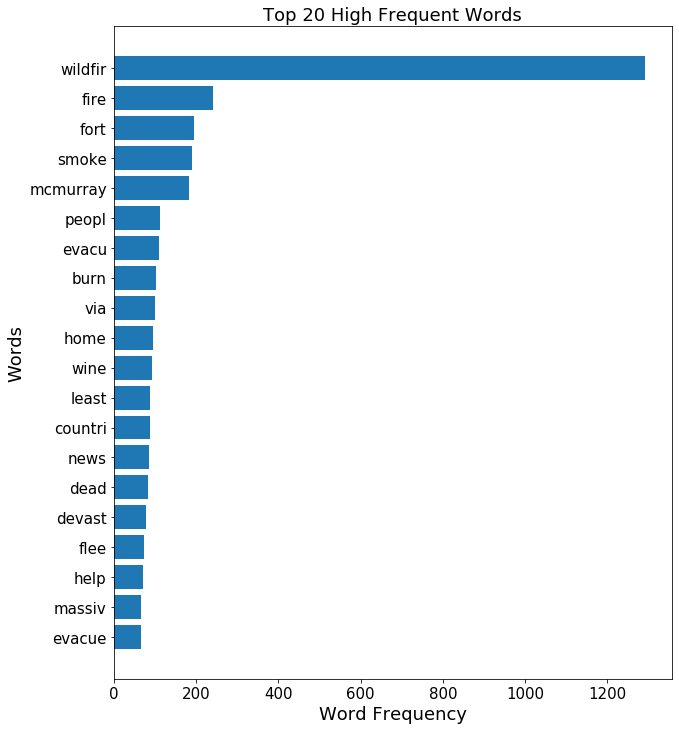

In [67]:
plt.figure(figsize=(10,12));
plt.barh(relevant_word_sum.index, relevant_word_sum);
plt.title('Top 20 High Frequent Words', fontsize=18)
plt.xlabel('Word Frequency', fontsize=18)
plt.ylabel('Words', fontsize=18)
plt.tick_params(labelsize=15)